# Visualizing statistical relationships

Statistical analysis is a process of understanding how variables in a dataset relate to each other and how those relationships depend on other variables. Visualization can be a core component of this process because, when data are visualized properly, the human visual system can see trends and patterns that indicate a relationship.

We will discuss three seaborn functions in this tutorial. The one we will use most is `relplot`. This is a `figure-level function` for visualizing statistical relationships using two common approaches: scatter plots and line plots. `relplot` combines a `FacetGrid` with one of two axes-level functions:

- `scatterplot` (with ``kind="scatter"``; the default)
- `lineplot` (with ``kind="line"``)

As we will see, these functions can be quite illuminating because they use simple and easily-understood representations of data that can nevertheless represent complex dataset structures. They can do so because they plot two-dimensional graphics that can be enhanced by mapping up to three additional variables using the semantics of hue, size, and style.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

%matplotlib inline
np.random.seed(sum(map(ord, "relational")))

## Relating variables with scatter plots
-------------------------------------

The scatter plot is a mainstay of statistical visualization. It depicts the joint distribution of two variables using a cloud of points, where each point represents an observation in the dataset. This depiction allows the eye to infer a substantial amount of information about whether there is any meaningful relationship between them.

There are several ways to draw a scatter plot in seaborn. The most basic, which should be used when both variables are numeric, is the `scatterplot` function. In the :`categorical visualization tutorial <categorical_tutorial>`, we will see specialized tools for using scatterplots to visualize categorical data. The `scatterplot` is the default ``kind`` in `relplot` (it can also be forced by setting ``kind="scatter"``):

In [2]:
# Load the example tips dataset
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


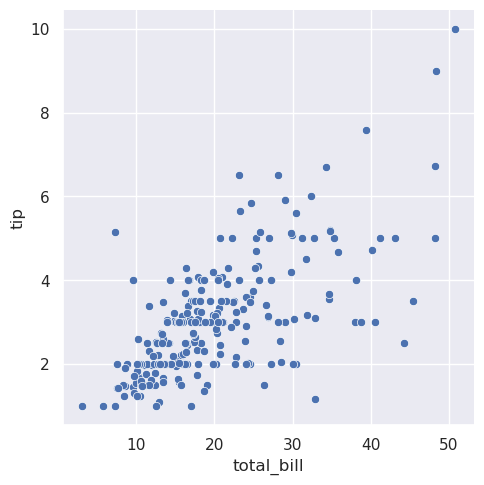

In [4]:
# Create a scatter plot showing total bill vs tip
sns.relplot(data=tips, x="total_bill", y="tip") # dataset, x-axis, y-axis

While the points are plotted in two dimensions, another dimension can be added to the plot by coloring the points according to a third variable. In seaborn, this is referred to as using a "hue semantic", because the color of the point gains meaning:

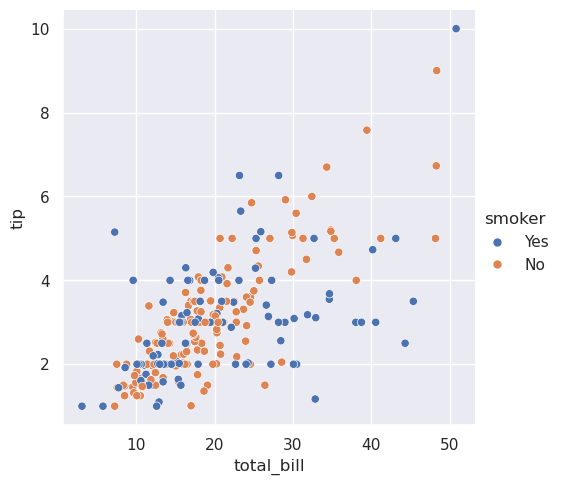

In [5]:
# Create a scatter plot showing total bill vs tip, colored by smoker status
sns.relplot(data=tips, x="total_bill", y="tip", # dataset, x-axis, y-axis
            hue="smoker") # color by smoker status

To emphasize the difference between the classes, and to improve accessibility, you can use a different marker style for each class:

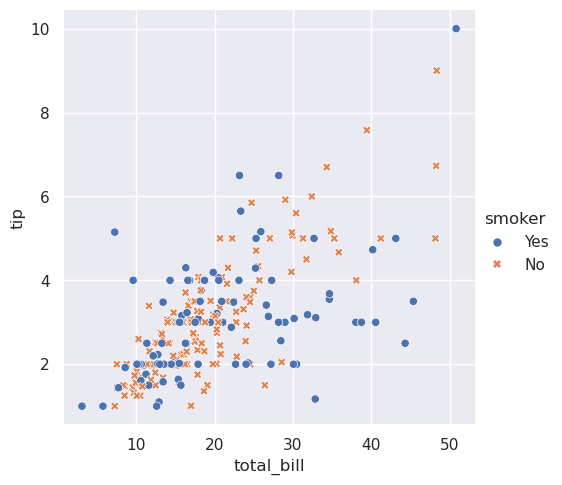

In [6]:
# Create a scatter plot showing total bill vs tip, colored and styled by smoker status
sns.relplot(
    data=tips, x="total_bill", y="tip", # dataset, x-axis, y-axis
    hue="smoker", # color by smoker status
    style="smoker" # shape by smoker status, this is the marker style
)

It's also possible to represent four variables by changing the hue and style of each point independently. But this should be done carefully, because the eye is much less sensitive to shape than to color:

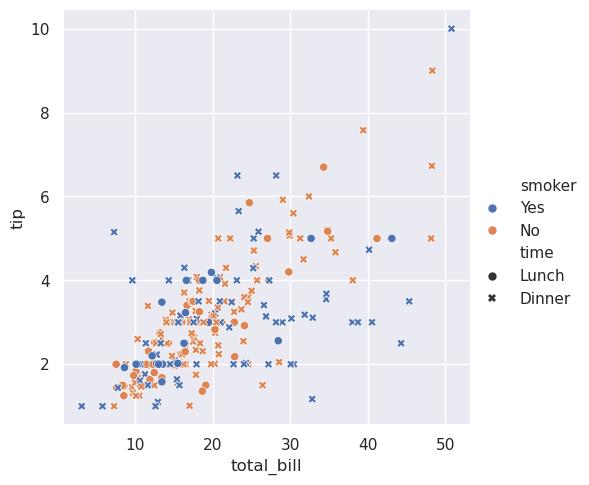

In [7]:
# Create a scatter plot showing total bill vs tip, colored by smoker status and styled by time of day
sns.relplot(
    data=tips, x="total_bill", y="tip",  # dataset, x-axis, y-axis
    hue="smoker", # color by smoker status
    style="time", # shape by time of day
)

In the examples above, the hue semantic was categorical, so the default `qualitative palette` was applied. If the hue semantic is numeric (specifically, if it can be cast to float), the default coloring switches to a sequential palette:

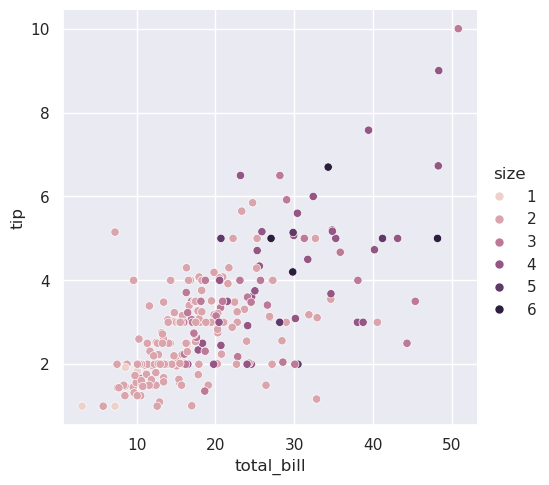

In [8]:
# Create a scatter plot showing total bill vs tip, colored by size of the dining party
sns.relplot(
    data=tips, x="total_bill", y="tip", # dataset, x-axis, y-axis
    hue="size", # color by size of the dining party
)

In both cases, you can customize the color palette. There are many options for doing so. Here, we customize a sequential palette using the string interface to `cubehelix_palette`:

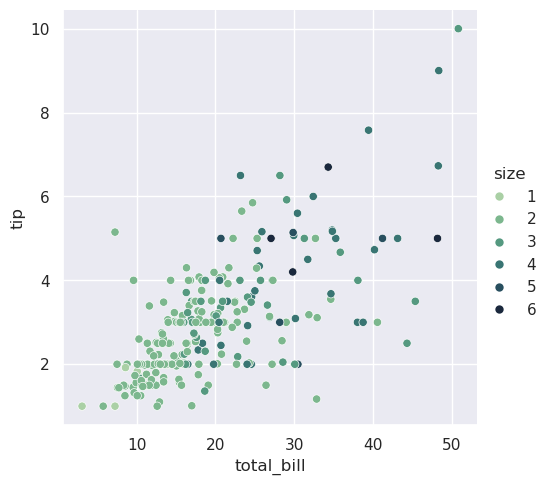

In [9]:
# Create a scatter plot showing total bill vs tip, colored by size of the dining party with a custom color palette
sns.relplot(
    data=tips, x="total_bill", y="tip", # dataset, x-axis, y-axis
    hue="size", # color by size of the dining party
    palette="ch:r=-.5,l=.75" # custom color palette
)

The third kind of semantic variable changes the size of each point:

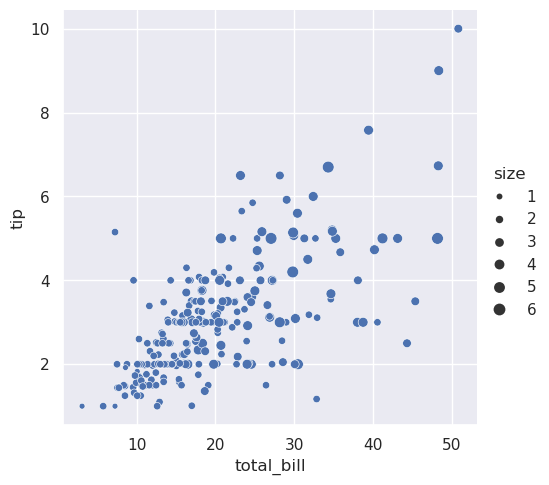

In [ ]:
# Create a scatter plot showing total bill vs tip, with point sizes representing the size of the dining party
sns.relplot(data=tips, x="total_bill", y="tip", # dataset, x-axis, y-axis
            size="size")# point size by size of the dining party

Unlike with `matplotlib.pyplot.scatter`, the literal value of the variable is not used to pick the area of the point. Instead, the range of values in data units is normalized into a range in area units. This range can be customized:

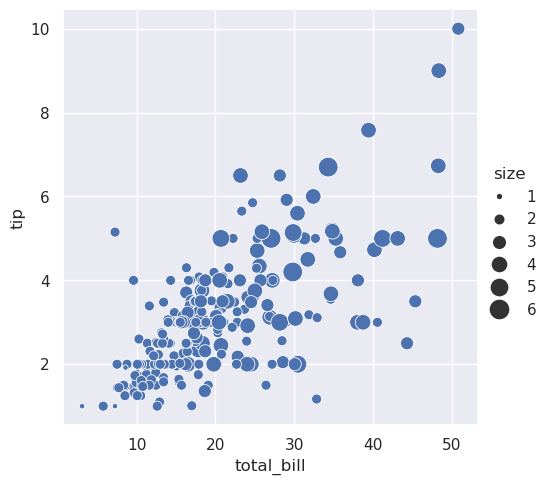

In [11]:
# Create a scatter plot showing total bill vs tip, sized by size of the dining party
sns.relplot(
    data=tips, x="total_bill", y="tip", # dataset, x-axis, y-axis
    size="size", # set the size of the marker by the size of the dining party
    sizes=(15, 200) # set the minimum and maximum size of the markers
)

More examples for customizing how the different semantics are used to show statistical relationships are shown in the `scatterplot` API examples.

## Emphasizing continuity with line plots
--------------------------------------
Scatter plots are highly effective, but there is no universally optimal type of visualisation. Instead, the visual representation should be adapted for the specifics of the dataset and to the question you are trying to answer with the plot.

With some datasets, you may want to understand changes in one variable as a function of time, or a similarly continuous variable. In this situation, a good choice is to draw a line plot. In seaborn, this can be accomplished by the `lineplot` function, either directly or with `relplot` by setting ``kind="line"``:

In [3]:
#load the data
dowjones = sns.load_dataset("dowjones")
dowjones.head()

,Date,Price
0,1914-12-01,55.00
1,1915-01-01,56.55
2,1915-02-01,56.00
3,1915-03-01,58.30
4,1915-04-01,66.45


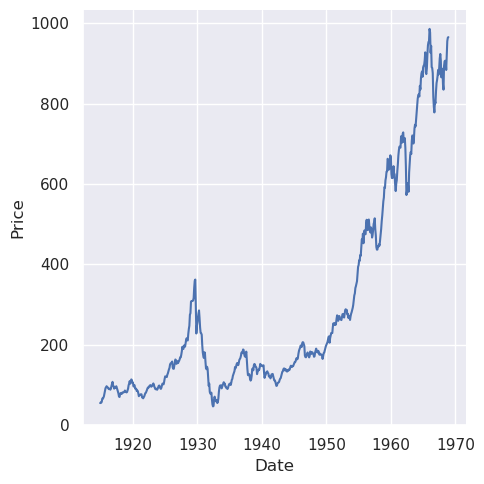

In [10]:
# Create a line plot showing Date vs Price
sns.relplot(data=dowjones, x="Date", y="Price",# dataset, x-axis, y-axis
            kind="line") # specify that we want a line plot using kind="line"

## Aggregation and representing uncertainty

More complex datasets will have multiple measurements for the same value of the ``x`` variable. The default behavior in seaborn is to aggregate the multiple measurements at each ``x`` value by plotting the mean and the 95% confidence interval around the mean:

In [15]:
#load the data
fmri = sns.load_dataset("fmri")
fmri.head() #note how timepoint 18 has multiple values for signal

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


In [14]:
#use indexing to show all rows where timepoint is 18
fmri[fmri.timepoint == 18].head(12)

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970
5,s9,18,stim,parietal,-0.103513
6,s8,18,stim,parietal,-0.064408
7,s7,18,stim,parietal,-0.060526
8,s6,18,stim,parietal,-0.007029
9,s5,18,stim,parietal,-0.040557
10,s4,18,stim,parietal,-0.048812


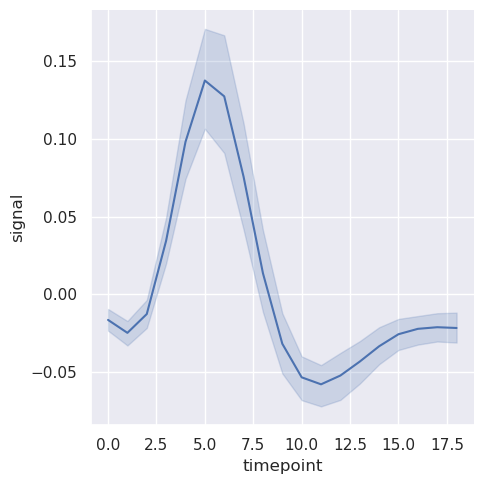

In [ ]:
# Create a line plot showing timepoint vs signal
sns.relplot(data=fmri, x="timepoint", y="signal", # dataset, x-axis, y-axis
            kind="line")# specify that we want a line plot using kind="line"
# This will average the signal values for each timepoint, and plot the confidence interval

The confidence intervals are computed using bootstrapping, which can be time-intensive for larger datasets. It's therefore possible to disable them:

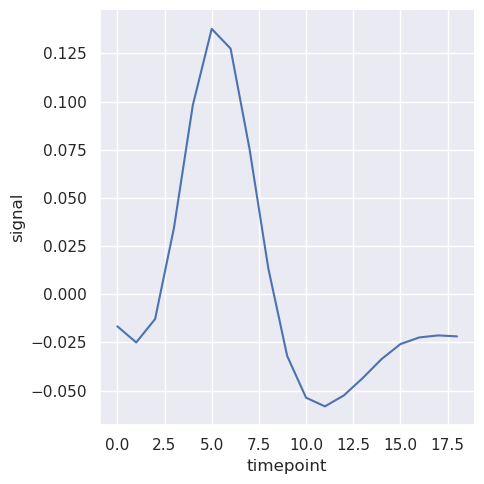

In [15]:
# Create a line plot showing timepoint vs signal without error bars
sns.relplot(
    data=fmri, x="timepoint", y="signal", # dataset, x-axis, y-axis
    kind="line", # specify that we want a line plot using kind="line"
    errorbar=None, # disable error bars, this will plot the mean signal for each timepoint only
)

Another good option, especially with larger data, is to represent the spread of the distribution at each timepoint by plotting the standard deviation instead of a confidence interval:

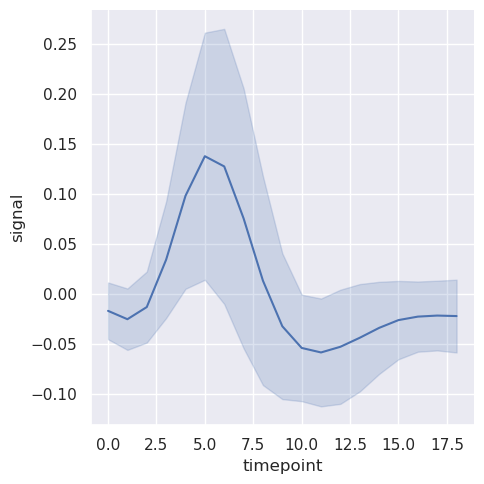

In [16]:
# Create a line plot showing timepoint vs signal with standard deviation error bars
sns.relplot(
    data=fmri, x="timepoint", y="signal", # dataset, x-axis, y-axis
    kind="line", # specify that we want a line plot using kind="line"
    errorbar="sd", # set error bars to standard deviation
)

To turn off aggregation altogether, set the ``estimator`` parameter to ``None`` This might produce a strange effect when the data have multiple observations at each point.

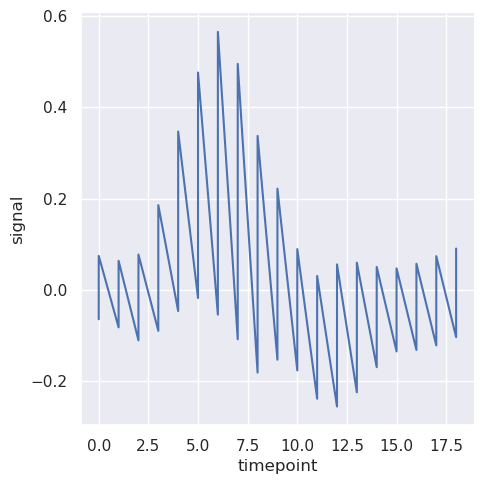

In [17]:
# Create a line plot showing timepoint vs signal without aggregation
sns.relplot(
    data=fmri, x="timepoint", y="signal", # dataset, x-axis, y-axis
    kind="line", # specify that we want a line plot using kind="line"
    estimator=None, # disable aggregation, this will plot all signal values for each timepoint. Can set to 'median', 'mean', 'max', 'min', etc
)

## Plotting subsets of data with semantic mappings

The `lineplot` function has the same flexibility as `scatterplot`: it can show up to three additional variables by modifying the hue, size, and style of the plot elements. It does so using the same API as `scatterplot`, meaning that we don't need to stop and think about the parameters that control the look of lines vs. points in matplotlib.

Using semantics in `lineplot` will also determine how the data get aggregated. For example, adding a hue semantic with two levels splits the plot into two lines and error bands, coloring each to indicate which subset of the data they correspond to.

In [18]:
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


In [19]:
#See the unique values in the event column
fmri['event'].unique()

array(['stim', 'cue'], dtype=object)

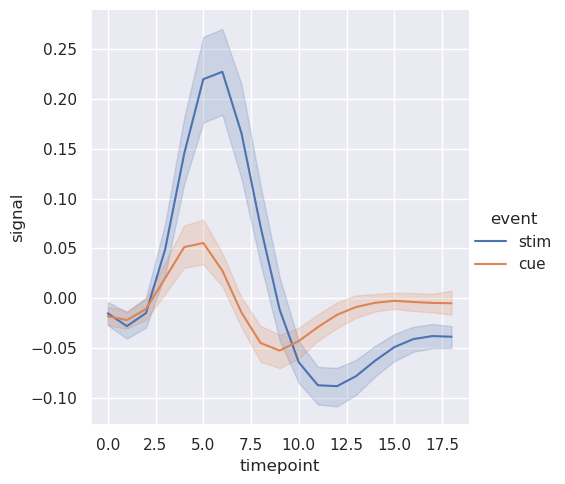

In [20]:
# Create a line plot showing timepoint vs signal, separated by event type
sns.relplot(
    data=fmri, x="timepoint", y="signal", # dataset, x-axis, y-axis
    kind="line", # specify that we want a line plot using kind="line"
    hue="event", # separate lines by event type
)

Adding a style semantic to a line plot changes the pattern of dashes in the line by default:

In [21]:
#see the unique values in the region column
fmri['region'].unique()

array(['parietal', 'frontal'], dtype=object)

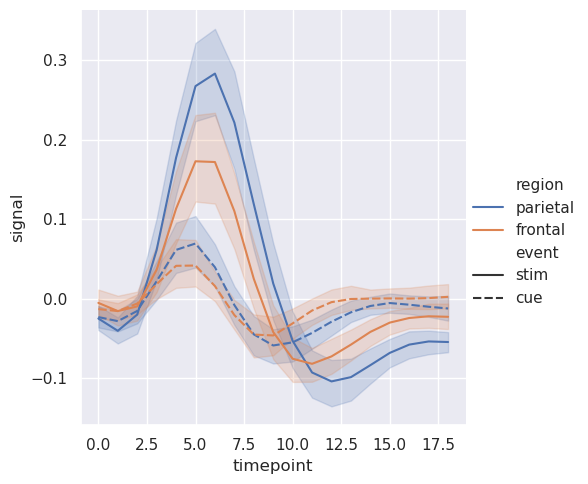

In [22]:
# Create a line plot showing timepoint vs signal, separated by region and event type
sns.relplot(
    data=fmri, x="timepoint", y="signal", # dataset, x-axis, y-axis
    kind="line", # specify that we want a line plot using kind="line"
    hue="region", # color by region
    style="event", # different line styles for event types, this add two more lines to the plot
)

But you can identify subsets by the markers used at each observation, either together with the dashes or instead of them:

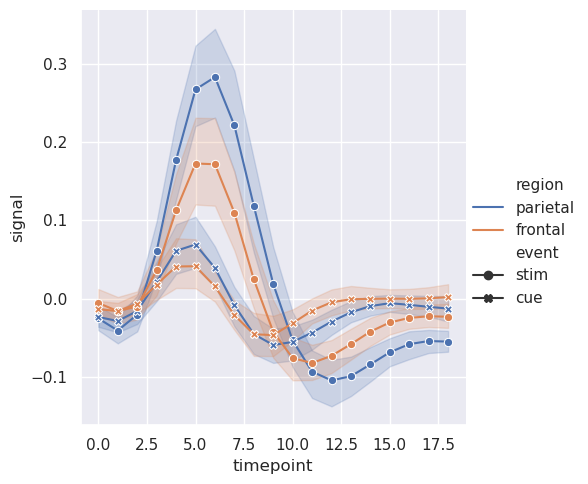

In [23]:
# Create a line plot showing timepoint vs signal, separated by region and event type with markers and no dashes
sns.relplot(
    data=fmri, x="timepoint", y="signal", # dataset, x-axis, y-axis
    kind="line", # specify that we want a line plot using kind="line"
    hue="region", # color by region
    style="event",# different line styles for event types, this add two more lines to the plot
    dashes=False, # no dashes in the lines, this makes all lines solid and slightly overrides the style parameter
    markers=True, # show markers on the lines, this adds markers to each data point when using the style parameter
)

As with scatter plots, be cautious about making line plots using multiple semantics. While sometimes informative, they can also be difficult to parse and interpret. But even when you are only examining changes across one additional variable, it can be useful to alter both the color and style of the lines. This can make the plot more accessible when printed to black-and-white or viewed by someone with color blindness:

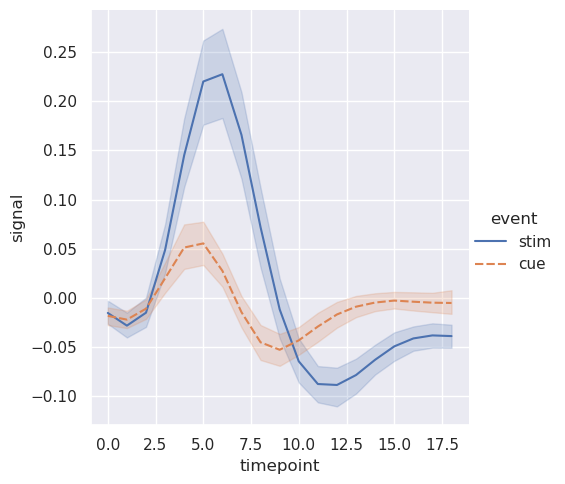

In [24]:
# Create a line plot showing timepoint vs signal, separated by event type
sns.relplot(
    data=fmri, x="timepoint", y="signal", # dataset, x-axis, y-axis
    kind="line", # specify that we want a line plot using kind="line"
    hue="event",# separate lines by event type
    style="event", # different line styles for event types, does not add new lines like before because hue and style are the same
)

When you are working with repeated measures data (that is, you have units that were sampled multiple times), you can also plot each sampling unit separately without distinguishing them through semantics. This avoids cluttering the legend:

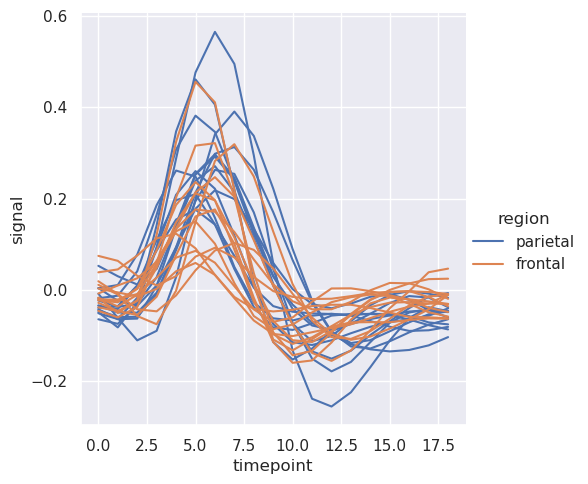

In [25]:
# Create a line plot showing timepoint vs signal without aggregation for stim event only
sns.relplot(
    data=fmri.query("event == 'stim'"), # filter for stim event only
    x="timepoint", y="signal", # dataset, x-axis, y-axis
    kind="line", # specify that we want a line plot using kind="line"
    hue="region", #set color by region
    units="subject", # each subject will have its own line
    estimator=None, # do not aggregate data, show all individual lines, can supplement using the following options: min, max, mean, median, etc.
)

In [26]:
# Create a new dataframe of the above data with only stim events
fmri_stim = fmri.query("event == 'stim'")
#select a unique subject to view
df = fmri_stim[fmri_stim.subject == fmri_stim.subject.unique()[0]]  
df.head() #notice how there is only one timepoint value per signal value now

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
15,s13,17,stim,parietal,-0.008265
29,s13,16,stim,parietal,-0.002856
43,s13,15,stim,parietal,-0.010971
57,s13,14,stim,parietal,-0.033713


The default colormap and handling of the legend in `lineplot` also depends on whether the hue semantic is categorical or numeric:

In [4]:
dots = sns.load_dataset("dots").query("align == 'dots'")
dots.head()

,align,choice,time,coherence,firing_rate
0,dots,T1,-80,0.0,33.189967
1,dots,T1,-80,3.2,31.691726
2,dots,T1,-80,6.4,34.279840
3,dots,T1,-80,12.8,32.631874
4,dots,T1,-80,25.6,35.060487


In [13]:
#see the unique coherence values
dots.coherence.unique()

array([ 0. ,  3.2,  6.4, 12.8, 25.6, 51.2])

In [14]:
#see the data types of the columns
dots.dtypes

align           object
choice          object
time             int64
coherence      float64
firing_rate    float64
dtype: object

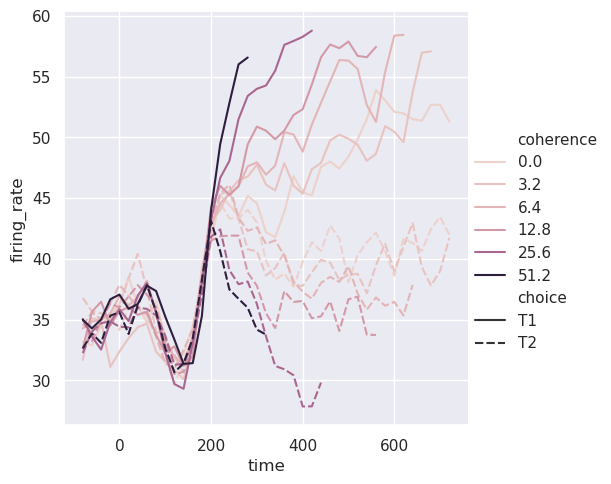

In [33]:
# Create a line plot showing time vs firing_rate, separated by coherence and choice
sns.relplot(
    data=dots, x="time", y="firing_rate", # dataset, x-axis, y-axis
    kind="line", # specify that we want a line plot using kind="line"
    hue="coherence", # set color by coherence
    style="choice", # set line style by choice
)

It may happen that, even though the ``hue`` variable is numeric, it is poorly represented by a linear color scale. That's the case here, where the levels of the ``hue`` variable are logarithmically scaled. You can provide specific color values for each line by passing a list or dictionary:

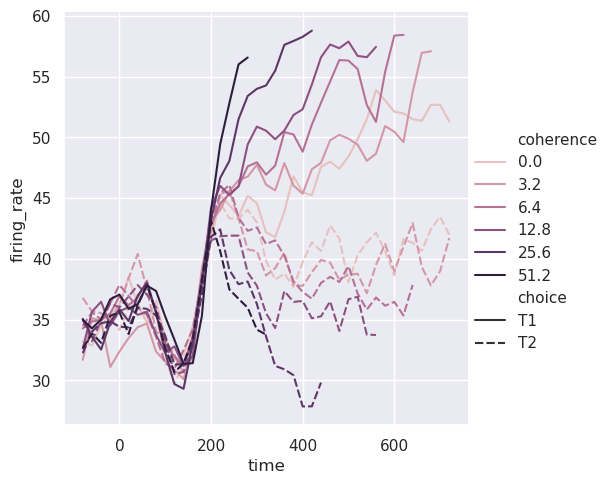

In [28]:
#create you rown custom color palette
palette = sns.cubehelix_palette(light=.8, n_colors=6)

# Create a line plot showing time vs firing_rate, separated by coherence and choice with custom palette
sns.relplot(
    data=dots, x="time", y="firing_rate", # dataset, x-axis, y-axis
    kind="line", # specify that we want a line plot using kind="line"
    hue="coherence",# set color by coherence, as done above
    style="choice", # set line style by choice
    palette=palette, # use the custom color palette defined above
)

Or you can alter how the colormap is normalized:

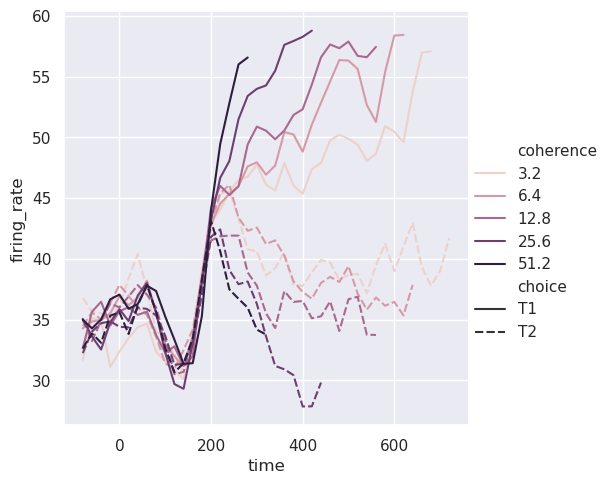

In [6]:
from matplotlib.colors import LogNorm #Imprt LogNorm for logarithmic color scale
#create you rown custom color palette
palette = sns.cubehelix_palette(light=.7, n_colors=6)

# Create a line plot showing time vs firing_rate, separated by coherence and choice with logarithmic color scale
sns.relplot(
    data=dots.query("coherence > 0"), x="time", y="firing_rate", # dataset, x-axis, y-axis. query used to remove sub-zero coherence values for LogNorm
     kind="line", # specify that we want a line plot using kind="line"
    hue="coherence", # set color by coherence, as done above
    hue_norm=LogNorm(), # set the color scale to logarithmic
    style="choice", # set line style by choice (solid vs dashed)
)

The third semantic, size, changes the width of the lines:

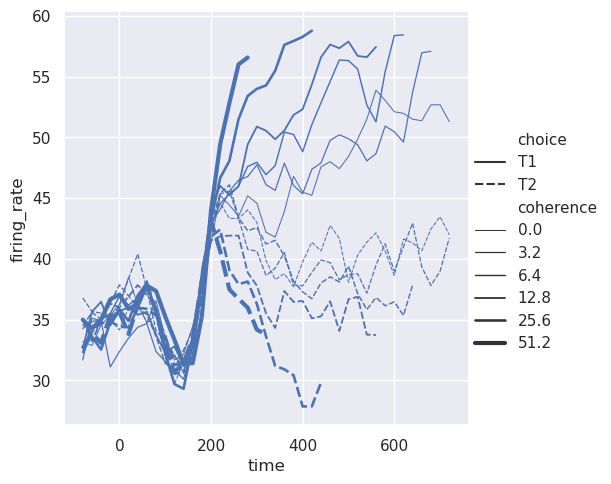

In [7]:
# Create a line plot showing time vs firing_rate, with line sizes representing coherence and styles representing choice
sns.relplot(
    data=dots, x="time", y="firing_rate", # dataset, x-axis, y-axis
    kind="line",# specify that we want a line plot using kind="line"
    size="coherence", # set line size by coherence
    style="choice", # set line style by choice
)

While the ``size`` variable will typically be numeric, it's also possible to map a categorical variable with the width of the lines. Be cautious when doing so, because it will be difficult to distinguish much more than "thick" vs "thin" lines. However, dashes can be hard to perceive when lines have high-frequency variability, so using different widths may be more effective in that case:

In [12]:
#see the unique coherence values
dots.choice.unique()

array(['T1', 'T2'], dtype=object)

In [11]:
#see dots column dtypes
dots.dtypes

align           object
choice          object
time             int64
coherence      float64
firing_rate    float64
dtype: object

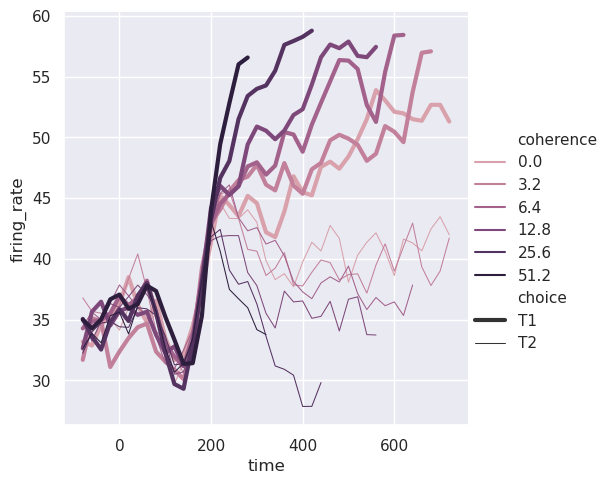

In [8]:
# Create a line plot showing time vs firing_rate, with line colors representing coherence and sizes representing choice with custom palette
sns.relplot(
    data=dots, x="time", y="firing_rate", # dataset, x-axis, y-axis
    kind="line",# specify that we want a line plot using kind="line"
    hue="coherence",  #set color by coherence
    size="choice", # set size by choice
    palette=palette, # use the custom color palette defined above
)

## Controlling sorting and orientation

Because `lineplot` assumes that you are most often trying to draw ``y`` as a function of ``x``, the default behavior is to sort the data by the ``x`` values before plotting. However, this can be disabled:

In [5]:
healthexp = sns.load_dataset("healthexp").sort_values("Year")
healthexp.head()

,Year,Country,Spending_USD,Life_Expectancy
0,1970,Germany,252.311,70.6
1,1970,France,192.143,72.2
2,1970,Great Britain,123.993,71.9
3,1970,Japan,150.437,72.0
4,1970,USA,326.961,70.9


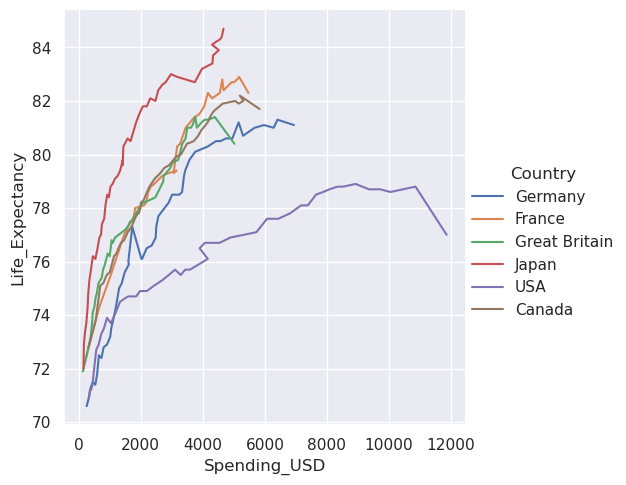

In [19]:
# Create a line plot showing Spending_USD vs Life_Expectancy, separated by Country
sns.relplot(
    data=healthexp, x="Spending_USD", y="Life_Expectancy", # dataset, x-axis, y-axis
    kind="line",# specify that we want a line plot using kind="line"
    hue="Country", # color lines by Country
    sort=False # disable sorting of x-axis values, change to True to enable sorting (default is True)
)

It's also possible to sort (and aggregate) along the y axis:

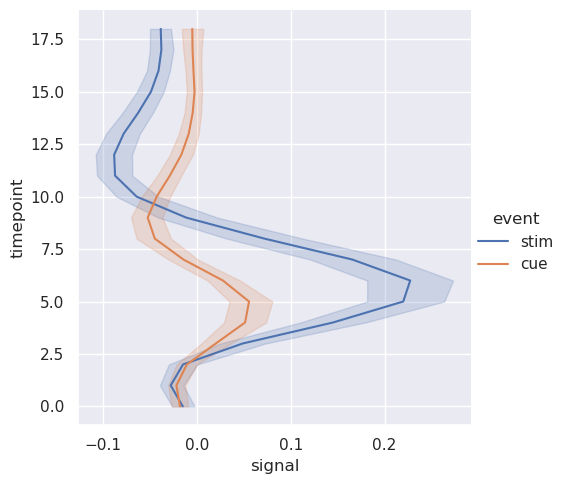

In [22]:
# Create a line plot showing signal vs timepoint, separated by event type
sns.relplot(
    data=fmri,  x="signal", y="timepoint", # dataset, x-axis, y-axis, note that we typically put time on the x-axis
    kind="line",# specify that we want a line plot using kind="line"
    hue="event",# separate lines by event type
    orient="y", # orient lines vertically, turn this off to compare
)

## Showing multiple relationships with facets
------------------------------------------

We've emphasized that these functions *can* show several semantic variables at once. However, it's not always effective to do so. But what about when you do want to understand how a relationship between two variables depends on more than one other variable?

The best approach may be to make more than one plot. Because `relplot` is based on the `FacetGrid`, this is easy to do. To show the influence of an additional variable, instead of assigning it to one of the semantic roles in the plot, use it to "facet" the visualization. This means that you make multiple axes and plot subsets of the data on each of them:

In [6]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [25]:
tips.time.unique()

['Dinner', 'Lunch']
Categories (2, object): ['Lunch', 'Dinner']

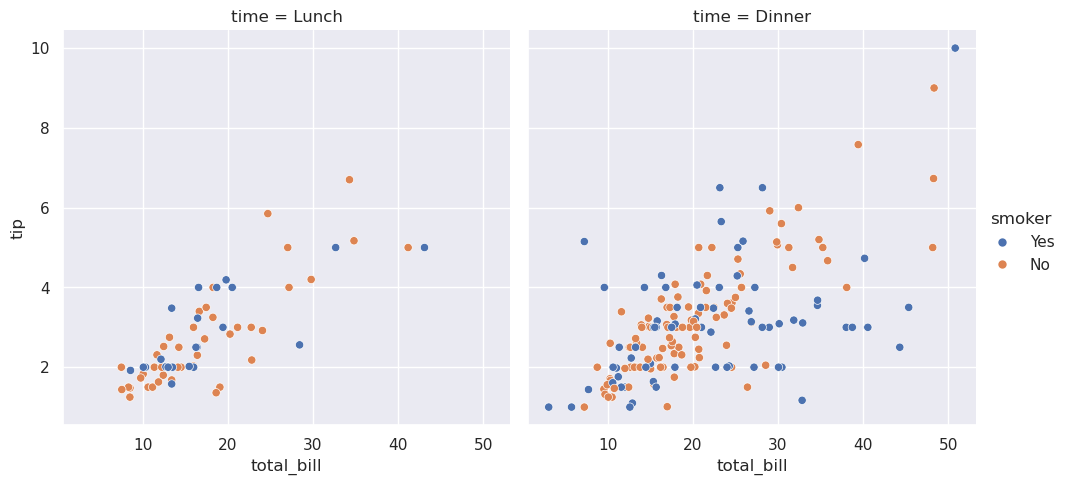

In [ ]:
# Create a scatter plot showing total bill vs tip, colored by smoker status and separated by time of day
sns.relplot(
    data=tips,  x="total_bill", y="tip", # dataset, x-axis, y-axis
    hue="smoker", # color by smoker status
    col="time", # separate by time of day (lunch vs dinner), see how this relates to the above unique values
)

You can also show the influence of two variables this way: one by faceting on the columns and one by faceting on the rows. As you start adding more variables to the grid, you may want to decrease the figure size. Remember that the size `FacetGrid` is parameterized by the height and aspect ratio of *each facet*:

In [16]:
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


In [17]:
#sort fmri by subject number
#convert subject strings to integers for sorting
subject_number = fmri["subject"].str[1:].astype(int) #the str[1:] removes the leading 's' from the subject strings
subject_number

0       13
1        5
2       12
3       11
4       10
        ..
1059     0
1060    13
1061    12
1062    11
1063     0
Name: subject, Length: 1064, dtype: int64

In [ ]:
#sort fmri by subject number, see the new reordered indices
sorted_numbers = subject_number.argsort()
sorted_numbers

0       1063
1       1059
2       1039
3         28
4         42
        ... 
1059     293
1060    1060
1061      29
1062     417
1063       0
Name: subject, Length: 1064, dtype: int64

In [ ]:
#sort fmri by subject number, use iloc to reorder rows by index
fmri_sorted= fmri.iloc[subject_number.argsort()]
fmri_sorted.head()

,subject,timepoint,event,region,signal
1063,s0,0,cue,parietal,-0.006899
1059,s0,8,cue,frontal,0.018165
1039,s0,13,cue,frontal,-0.021729
28,s0,17,stim,parietal,-0.071300
42,s0,16,stim,parietal,-0.057715


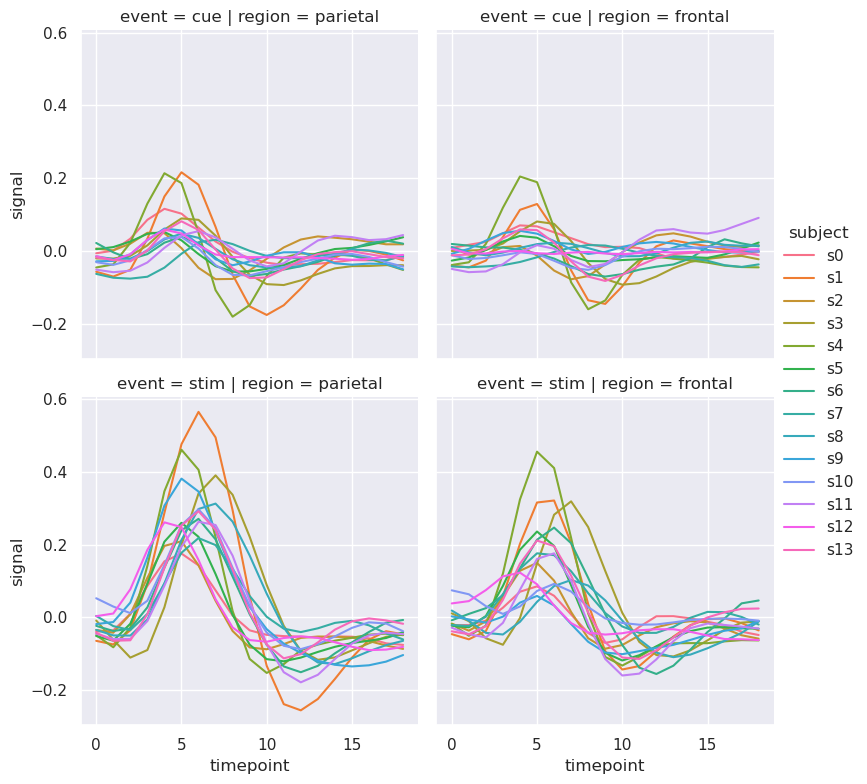

In [22]:
# Create a line plot showing timepoint vs signal, separated by region and event type with each subject having its own line
sns.relplot(
    data=fmri_sorted,  x="timepoint", y="signal", # dataset, x-axis, y-axis
    kind="line",# specify that we want a line plot using kind="line"
    hue="subject",# each subject has its own line
    col="region", # separate plots by region along the columns
    row="event", # separate plots by event along the rows
    height=4, # set the height of each subplot
    estimator=None # do not aggregate data, show all individual lines
)

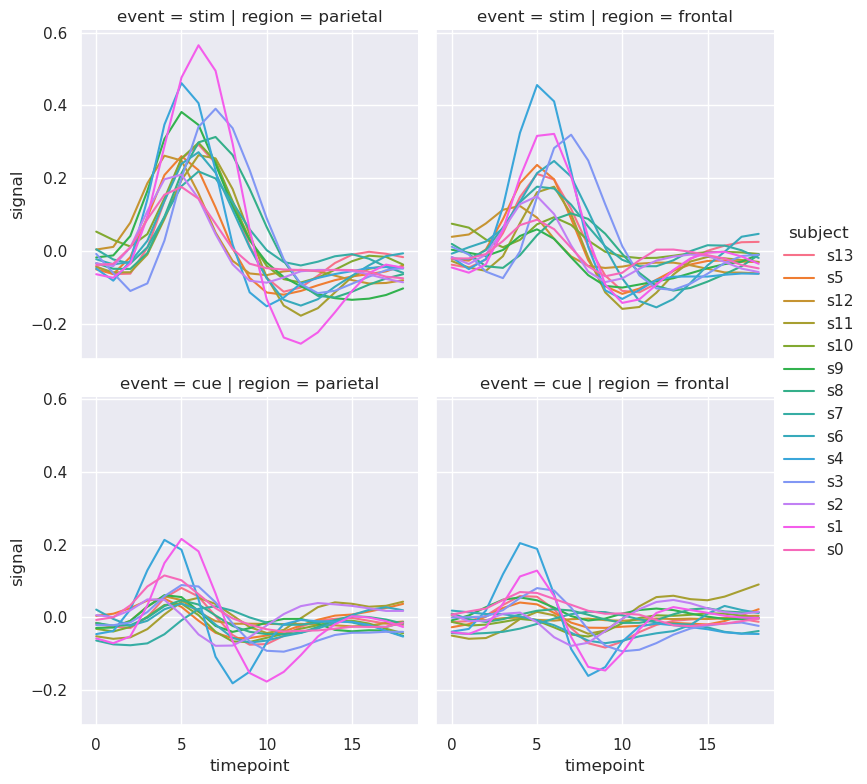

In [23]:
#without sorting the subjects
sns.relplot(
    data=fmri,  x="timepoint", y="signal", # dataset, x-axis, y-axis
    kind="line",# specify that we want a line plot using kind="line"
    hue="subject",# each subject has its own line
    col="region", # separate plots by region along the columns
    row="event", # separate plots by event along the rows
    height=4, # set the height of each subplot
    estimator=None # do not aggregate data, show all individual lines
)

When you want to examine effects across many levels of a variable, it can be a good idea to facet that variable on the columns and then "wrap" the facets into the rows:

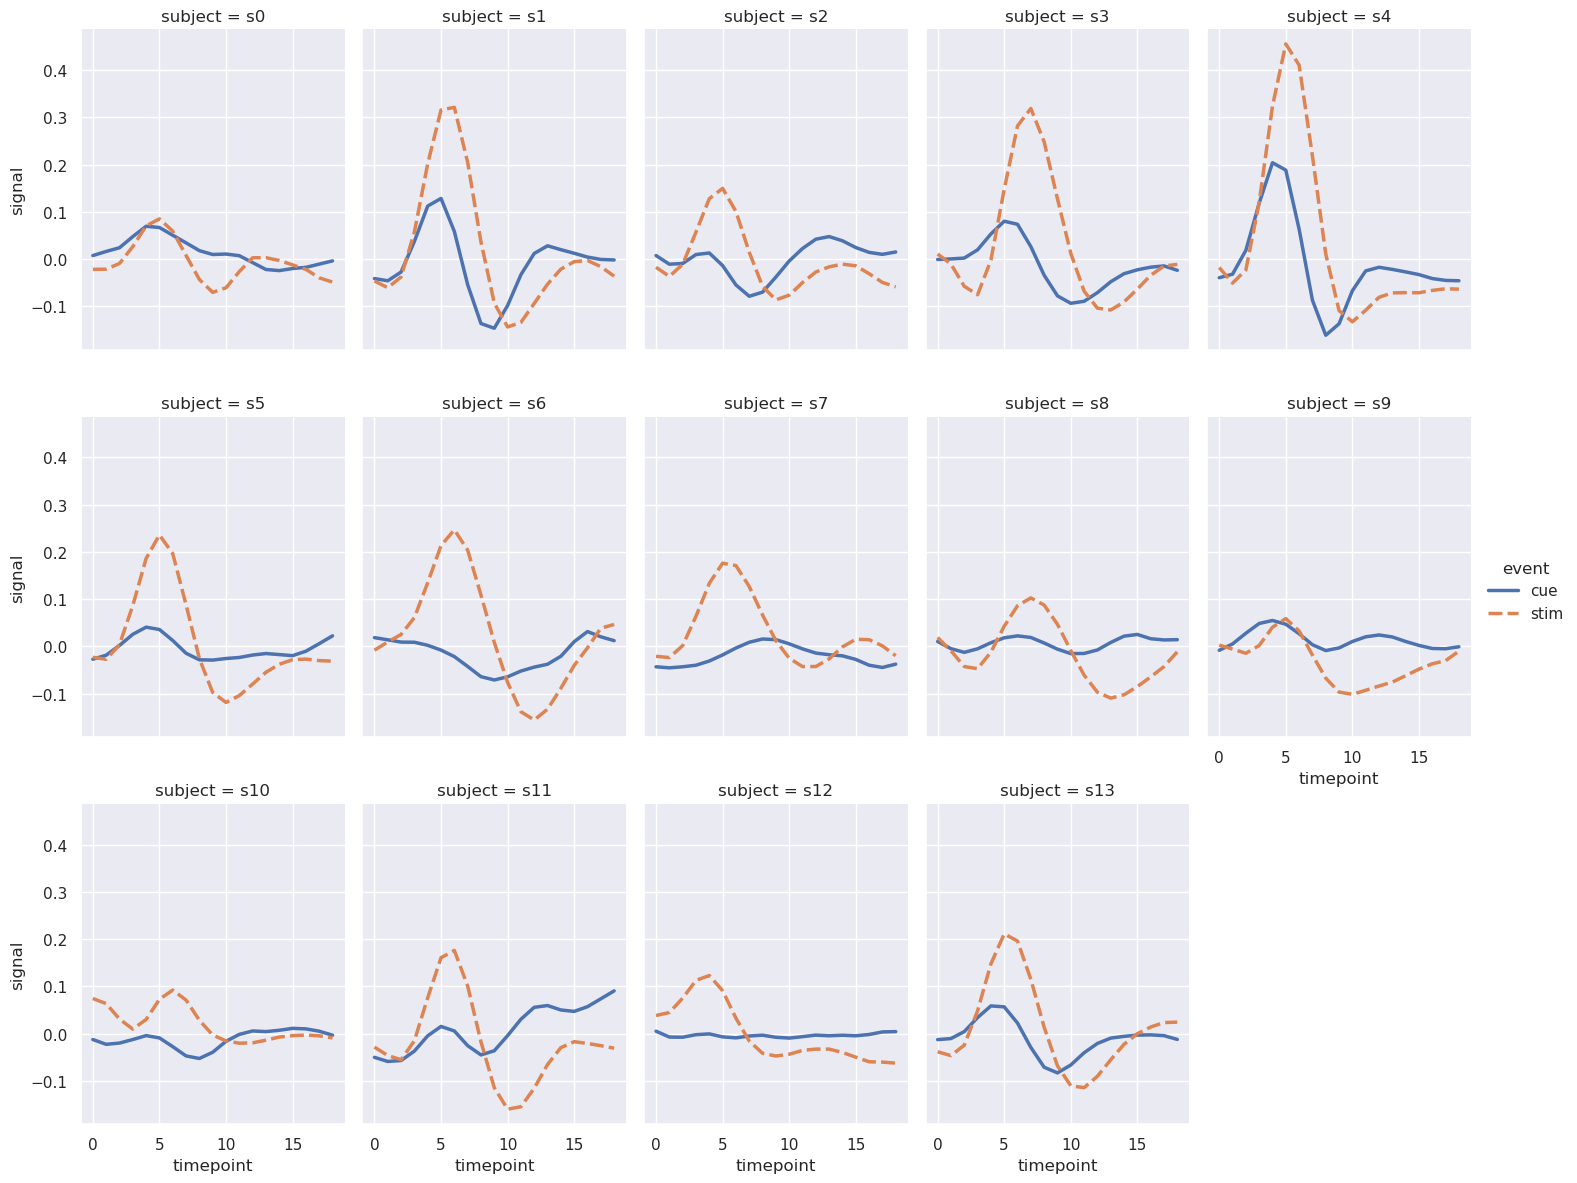

In [ ]:
sns.relplot(
    data=fmri_sorted.query("region == 'frontal'"), x="timepoint", y="signal", # dataset, x-axis, y-axis, query for frontal region only
    kind="line", # specify that we want a line plot using kind="line"
    hue="event", # color lines by event type
    style="event", # use different line styles for event types
    col="subject", # separate plots by subject along the columns
    col_wrap=5, # wrap the column facets after 5 plots (5 plots wide)
    height=4, aspect=.75, linewidth=2.5, # set height, aspect ratio, and line width
)

These visualizations, which are sometimes called "lattice" plots or "small-multiples", are very effective because they present the data in a format that makes it easy for the eye to detect both overall patterns and deviations from those patterns. While you should make use of the flexibility afforded by `scatterplot` and `relplot`, always try to keep in mind that several simple plots are usually more effective than one complex plot.

Now that we know how to examine statistical relationships with our data, lets transition to [Visualizatin Data Distributions](./distributions.ipynb)